The following line installs pyspedas in the current environment.  It is necessary for Google Colab.

In [ ]:
!pip install pyspedas

Basic PySPEDAS example: Import necessary modules, load THEMIS FGM data for probe THEMIS-A, for time range 2007-03-23 to 2007-03-24, print a list of tplot variables, and plot two of them.


09-Oct-23 23:40:18: Downloading remote index: http://themis.ssl.berkeley.edu/data/themis/tha/l2/fgm/2007/
09-Oct-23 23:40:18: File is current: themis_data/tha/l2/fgm/2007/tha_l2_fgm_20070323_v01.cdf


0 : tha_fgs_btotal
1 : tha_fgs_gse
2 : tha_fgs_gsm
3 : tha_fgs_dsl
4 : tha_fgl_btotal
5 : tha_fgl_gse
6 : tha_fgl_gsm
7 : tha_fgl_dsl
8 : tha_fgl_ssl
9 : tha_fgh_btotal
10 : tha_fgh_gse
11 : tha_fgh_gsm
12 : tha_fgh_dsl
13 : tha_fgh_ssl
14 : tha_fge_btotal
15 : tha_fge_gse
16 : tha_fge_gsm
17 : tha_fge_dsl
18 : tha_fge_ssl


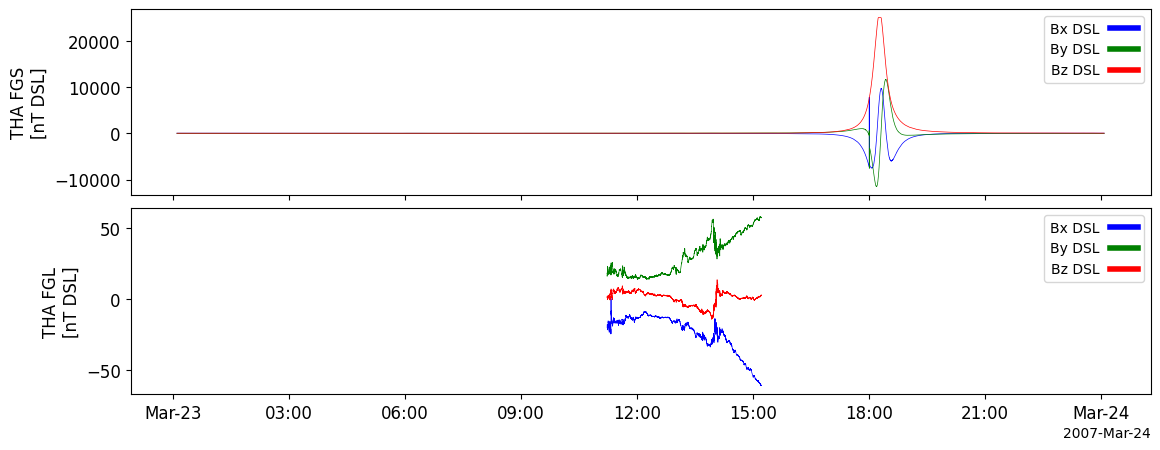

In [1]:
import pyspedas
from pytplot import tplot_names, get_data, tplot

pyspedas.themis.fgm(trange=['2007-03-23','2007-03-24'], probe='a')
tplot_names()
tplot(['tha_fgs_dsl', 'tha_fgl_dsl'])


Examine the data and metadata for one of the tplot variables just loaded

In [ ]:
data_arrays = get_data('tha_fgs_dsl')
print("Structure returned by get_data()", data_arrays)
data_times=data_arrays.times
data_vals=data_arrays.y
print("Data times",data_times)
print("Data values",data_vals)

Extract the metadata from the same tplot variable

In [ ]:
md=get_data('tha_fgs_dsl',metadata=True)
print("Metadata structure:")
print(md)
print("")
print("Metadata CDF.LABELS entries:", md["CDF"]["LABELS"])
print("")
print("Metadata data_att entries:", md["data_att"])
print("")
print("Metadata plot_options entries:",md["plot_options"])


Load and plot MMS FGM data

In [ ]:
mms_tplot_vars = pyspedas.mms.fgm(probe=[1,2],trange=['2015-10-16','2015-10-17'])
print(mms_tplot_vars)
tplot('mms2_fgm_b_gsm_srvy_l2_bvec')

Load and plot MMS FEEPS spectrogram data

In [ ]:
pyspedas.mms.feeps(probe='1', trange=['2015-10-16','2015-10-17'],datatype='electron')
tplot(['mms1_epd_feeps_srvy_l2_electron_intensity_omni','mms1_epd_feeps_srvy_l2_electron_intensity_omni_spin'])

Perform some coordinate transforms on previously loaded THEMIS FGM data

In [ ]:
from pyspedas.themis.cotrans import dsl2gse

dsl2gse('tha_fgl_dsl',name_out='tha_fgl_gse')
pyspedas.cotrans('tha_fgl_gse',coord_out='GEI',name_out='tha_fgl_gei')
pyspedas.cotrans('tha_fgl_gse',coord_out='GSM',name_out='tha_fgl_gsm')
tplot(['tha_fgl_dsl','tha_fgl_gse','tha_fgl_gei','tha_fgl_gsm'])
